In [222]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [223]:
train = pd.read_csv('train.csv', index_col = 0)
#train.head()
train.describe()   #No missing data

,DayOfWeek,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125","Inn 1 Team 1 NOP R<25, SR>125",Inn 1 Team 1 Total 4s,Inn 1 Team 1 Total 6s,Inn 1 Team 1 Max Strike Rate_ALLBatsmen,Inn 1 Team 2 NoP fast bowlers,Inn 1 Team 2 NoP Spinners,...,"Inn 2 Team 2 NOP R<25, SR>125",Inn 2 Team 2 Total 4s,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,"Team won(team 1=1, team 2=0)"
count,252.000000,252.000000,252.000000,252.00000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,4.011905,7.440476,0.625198,1.43254,1.531746,13.726190,4.880952,198.511627,3.825397,2.146825,...,1.250000,12.658730,4.519841,188.509246,3.674603,2.146825,3.309524,2.091270,5.337302,0.440476
std,2.000960,2.353354,0.131620,0.98566,1.185480,4.666618,2.996963,69.901951,1.006587,1.020834,...,1.095536,4.379712,2.753412,56.843114,1.000632,0.976961,2.119777,1.610351,3.240880,0.497432
min,1.000000,3.000000,0.160000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.000000,0.560000,1.00000,1.000000,11.000000,3.000000,161.110000,3.000000,1.000000,...,0.000000,10.000000,2.750000,153.092500,3.000000,1.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,7.000000,0.655000,1.00000,1.000000,14.000000,5.000000,185.710000,4.000000,2.000000,...,1.000000,12.000000,4.000000,185.710000,4.000000,2.000000,3.000000,2.000000,5.000000,0.000000
75%,6.000000,8.000000,0.720000,2.00000,2.000000,17.000000,7.000000,220.000000,4.000000,3.000000,...,2.000000,16.000000,6.000000,222.220000,4.000000,3.000000,5.000000,3.000000,7.000000,1.000000
max,7.000000,22.000000,0.880000,4.00000,6.000000,25.000000,17.000000,600.000000,6.000000,6.000000,...,5.000000,25.000000,14.000000,385.710000,6.000000,5.000000,9.000000,8.000000,16.000000,1.000000


Calculating Wickets and Runs scored by each teams by considering the other data provided for further process.

In [224]:
train['DateOfGame']=pd.to_datetime(train['DateOfGame'])
#train['year'] = train['DateOfGame'].dt.year
#train['month'] = train['DateOfGame'].dt.month
train['Team1_wickets'] = train['Inn 1 Team 2 wickets taken_catches_runout']+train['Inn1 Team 2 wickets taken_ bowled _lbw_caught by keeper_stumping']
train['Team2_wickets'] = train['Inn 2 Team 1 wickets taken_catches_runout']+train['Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping']
#train.head()

In [225]:
def runs(strikerate, wballs):
    run = (strikerate * (120 + wballs)) / 100
    return run
x1= runs (train['Inn 1 Team 1 Max Strike Rate_ALLBatsmen'],train['Inn 1 Team 2 Extras conceded in_wides_No Balls'])
train['Team1_runs']=x1.round(0).astype(int)
x2= runs (train['Inn 2 Team 2 Max Strike Rate_ALLBatsmen'],train['Inn 2 Team 1 Extras conceded in_wides_No Balls'])
train['Team2_runs']=x2.round(0).astype(int)
#train = train.drop(['TimeOfGame'], axis=1)
#train.rename(columns={'Team won(team 1=1, team 2=0)':'First_batting'},inplace = True)

Winner team is defined by the maximum total runs scored by respective team

In [226]:
train['win_team'] = np.where(train['Team1_runs']>train['Team2_runs'], 1,0)
#train['winner'] = np.where(train['Team1_runs']>train['Team2_runs'],train['Team 1'],train['Team 2'])
train.head()

,Team 1,Team 2,City,DayOfWeek,DateOfGame,TimeOfGame,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125","Inn 1 Team 1 NOP R<25, SR>125",...,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,"Team won(team 1=1, team 2=0)",Team1_wickets,Team2_wickets,Team1_runs,Team2_runs,win_team
Game ID,,,,,,,,,,,,,,,,,,,,,
1,Koramangala Traffic Jammers,Whitefield Water Loggers,Whitefield,1,2012-01-01,20.00.00,6,0.49,1,1,...,0,6,4,11,1,3,10,279,157,1
2,Electronic City Power Savers,Silkboard Slow Movers,Silkboard,2,2012-01-02,17.00.00,7,0.44,3,2,...,1,4,0,5,1,5,4,305,269,1
3,Indranagar Pub Watchers,Sarjapur Water Tankers,Sarjapur,3,2012-01-03,20.30.00,11,0.23,2,2,...,3,0,1,10,0,8,1,246,390,0
4,Bellandur Froth Fighters,Koramangala Traffic Jammers,Koramangala,4,2012-01-04,16.00.00,6,0.61,0,2,...,2,3,2,16,0,10,5,176,136,1
5,Marathalli Chokers,Whitefield Water Loggers,Marathalli,5,2012-01-05,20.00.00,6,0.56,3,1,...,2,4,1,5,0,6,5,287,257,1


By the below Graph, it is shown that which team has got maximum number of match win counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

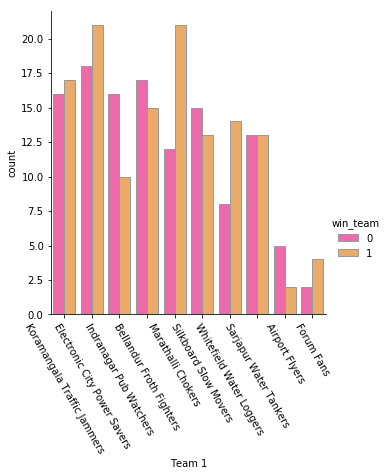

In [227]:
sns.catplot(x='Team 1',hue='win_team',kind='count',palette="spring", edgecolor=".6",data=train)
plt.xticks(rotation= -60)

(Text(0.5,0,'Team Names'),
 Text(0,0.5,'Inn 1 Team 1 Total 6s,'),
 Text(0.5,1,"6's Scored by Team 1"))

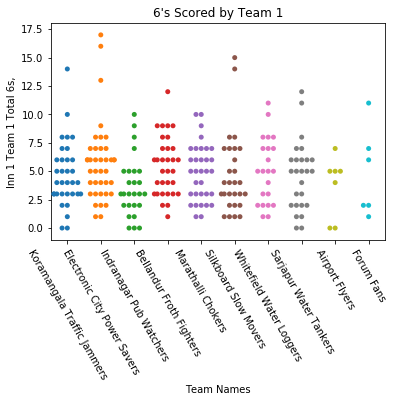

In [228]:
sns.swarmplot(x=train['Team 1'],y=train['Inn 1 Team 1 Total 6s'])
plt.xticks(rotation= -60)
plt.xlabel('Team Names'), plt.ylabel('Inn 1 Team 1 Total 6s,'), plt.title("6's Scored by Team 1")

(Text(0.5,0,'Team Names'),
 Text(0,0.5,'Inn 2 Team 2 Total 6s,'),
 Text(0.5,1,"6's Scored by Team 2"))

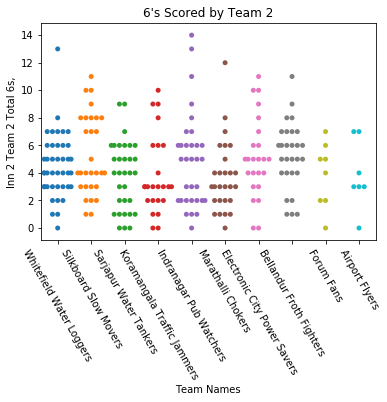

In [229]:
sns.swarmplot(x=train['Team 2'],y=train['Inn 2 Team 2 Total 6s'])
plt.xticks(rotation= -60)
plt.xlabel('Team Names'), plt.ylabel('Inn 2 Team 2 Total 6s,'), plt.title("6's Scored by Team 2")

First row graph represents the maximum strikes for different teams.
Second row graph represents the number of extra balls acquired my each teams.

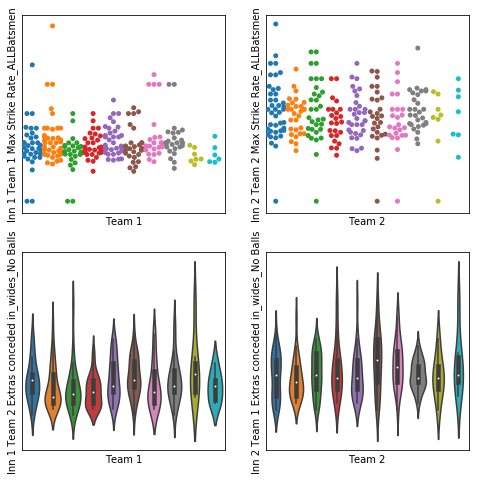

In [230]:
f, ax=plt.subplots(2,2,figsize = (8,8))
sns.swarmplot(x=train['Team 1'],y=train['Inn 1 Team 1 Max Strike Rate_ALLBatsmen'],ax=ax[0,0])
sns.swarmplot(x=train['Team 2'],y=train['Inn 2 Team 2 Max Strike Rate_ALLBatsmen'],ax=ax[0,1])
sns.violinplot(x=train['Team 1'],y=train['Inn 1 Team 2 Extras conceded in_wides_No Balls'],ax=ax[1,0])
sns.violinplot(x=train['Team 2'],y=train['Inn 2 Team 1 Extras conceded in_wides_No Balls'],ax=ax[1,1])
plt.setp(ax, yticks=[],xticks=[])
plt.show()


In [231]:
#train['Team 1'].unique()
train.dtypes

Team 1                                                                      object
Team 2                                                                      object
City                                                                        object
DayOfWeek                                                                    int64
DateOfGame                                                          datetime64[ns]
TimeOfGame                                                                  object
AvgWindSpeed                                                                 int64
AvgHumidity                                                                float64
Inn 1 Team 1 NOP R>25,SR>125                                                 int64
Inn 1 Team 1 NOP R<25, SR>125                                                int64
Inn 1 Team 1 Total 4s                                                        int64
Inn 1 Team 1 Total 6s                                                        int64
Inn 

In [232]:
objects = ['Team 1','Team 2','City']
le = LabelEncoder()
for i in objects:
    train[i] = le.fit_transform(train[i])

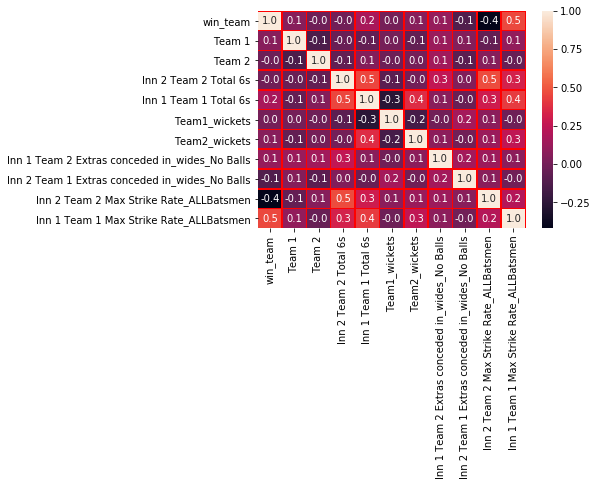

In [233]:
data = train[['win_team','Team 1','Team 2','Inn 2 Team 2 Total 6s','Inn 1 Team 1 Total 6s','Team1_wickets','Team2_wickets',
           'Inn 1 Team 2 Extras conceded in_wides_No Balls','Inn 2 Team 1 Extras conceded in_wides_No Balls'
            ,'Inn 2 Team 2 Max Strike Rate_ALLBatsmen','Inn 1 Team 1 Max Strike Rate_ALLBatsmen']]
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f')
plt.show()

1.0


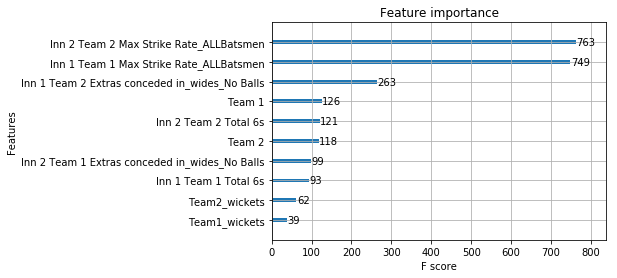

In [234]:
x = train[['Team 1','Team 2','Inn 2 Team 2 Total 6s','Inn 1 Team 1 Total 6s','Team1_wickets','Team2_wickets',
           'Inn 1 Team 2 Extras conceded in_wides_No Balls','Inn 2 Team 1 Extras conceded in_wides_No Balls'
            ,'Inn 2 Team 2 Max Strike Rate_ALLBatsmen','Inn 1 Team 1 Max Strike Rate_ALLBatsmen']]
y = train[['win_team']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)
model = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model.fit(x_train,y_train.values.ravel())
print(model.score(x_train,y_train))
#print(model.score(x_test,y_test))
plot_importance(model)

The Feature Importance plot shows which features are contributing more for the model development. The more the F1 Score the more important they are.

In [235]:
y_testpred = model.predict(x_test)
tpredictions = [round(value) for value in y_testpred]
#tpred = pd.DataFrame(tpredictions, columns = ['win_probabilities'])
taccuracy = accuracy_score(y_test, tpredictions)
print("Train Accuracy : %.2f%%" % (taccuracy * 100.0))

Train Accuracy : 97.37%


In [236]:
test = pd.read_csv('test.csv', index_col = 0)
test.describe()

,Day,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125","Inn 1 Team 1 NOP R<25, SR>125",Inn 1 Team 1 Total 4s,Inn 1 Team 1 Total 6s,Inn 1 Team 1 Max Strike Rate_ALLBatsmen,Inn 1 Team 2 NoP fast bowlers,Inn 1 Team 2 NoP Spinners,...,"Inn 2 Team 2 NOP R<25, SR>125",Inn 2 Team 2 Total 4s,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,"Team won(team 1=1, team 2=0)"
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,...,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,3.986842,6.842105,0.660263,1.342105,1.355263,12.907895,5.157895,202.138947,3.657895,2.157895,...,1.421053,12.236842,4.460526,191.971974,3.328947,2.223684,3.434211,2.184211,4.197368,0.447368
std,2.023155,1.405253,0.073266,0.973689,1.162801,4.910336,3.072687,81.633354,1.027004,0.994017,...,1.224888,4.162911,2.918633,72.436529,1.135936,1.078254,1.899723,1.771707,3.015603,0.500526
min,1.000000,5.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.000000,0.600000,1.000000,1.000000,10.000000,3.000000,157.480000,3.000000,2.000000,...,0.000000,10.000000,2.000000,154.012500,3.000000,1.750000,2.000000,1.000000,2.000000,0.000000
50%,4.000000,7.000000,0.660000,1.000000,1.000000,13.000000,5.000000,182.005000,4.000000,2.000000,...,1.000000,12.000000,4.000000,175.000000,3.000000,2.000000,3.500000,2.000000,4.000000,0.000000
75%,6.000000,8.000000,0.730000,2.000000,2.000000,16.000000,7.000000,233.925000,4.000000,3.000000,...,2.000000,14.250000,6.000000,219.312500,4.000000,3.000000,5.000000,3.000000,6.000000,1.000000
max,7.000000,10.000000,0.750000,3.000000,6.000000,24.000000,14.000000,600.000000,6.000000,4.000000,...,5.000000,22.000000,14.000000,400.000000,8.000000,5.000000,8.000000,7.000000,16.000000,1.000000


In [237]:
test['DateOfGame']=pd.to_datetime(test['DateOfGame'])
test['Team1_wickets'] = test['Inn 1 Team 2 wickets taken_catches_runout']+test['Inn1 Team 2 wickets taken_ bowled _lbw_caught by keeper_stumping']
test['Team2_wickets'] = test['Inn 2 Team 1 wickets taken_catches_runout']+test['Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping']

In [238]:
#test['win_team'] = np.where(test['Team1_runs']>test['Team2_runs'], 1,0)
test.rename(columns={'CityOfGame':'City'},inplace = True)
#test.head()

In [239]:
labels = ['Team 1','Team 2','City']
for i in labels:
    test[i] = le.fit_transform(test[i])
test.head()

,Team 1,Team 2,City,Day,DateOfGame,TimeOfGame,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125","Inn 1 Team 1 NOP R<25, SR>125",...,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,"Team won(team 1=1, team 2=0)",Team1_wickets,Team2_wickets
Game ID,,,,,,,,,,,,,,,,,,,,,
253,1,5,1,6,2016-01-01,20.00.00,5,0.62,1,1,...,5,142.85,3,3,1,1,3,0,10,2
254,4,6,4,7,2016-01-02,20.00.00,6,0.66,1,3,...,4,210.00,3,2,1,1,1,0,9,2
255,2,5,5,1,2016-01-03,16.00.00,5,0.64,0,2,...,1,166.66,4,2,2,7,4,1,9,9
256,3,7,3,2,2016-01-04,20.00.00,5,0.64,1,3,...,4,166.66,2,4,6,3,2,1,4,9
257,8,6,8,3,2016-01-05,16.00.00,5,0.62,2,0,...,2,160.00,4,2,6,1,2,1,8,7


In [240]:
x_16 = test[['Team 1','Team 2','Inn 2 Team 2 Total 6s','Inn 1 Team 1 Total 6s','Team1_wickets','Team2_wickets',
           'Inn 1 Team 2 Extras conceded in_wides_No Balls','Inn 2 Team 1 Extras conceded in_wides_No Balls'
            ,'Inn 2 Team 2 Max Strike Rate_ALLBatsmen','Inn 1 Team 1 Max Strike Rate_ALLBatsmen']]

#y_pred2 = model_x.predict(x_test2)
#predictions = [round(value) for value in y_pred2]
#pred = pd.DataFrame(predictions, columns = ['win'])

y_16 = model.predict(x_16)
y_pred = [round(value) for value in y_16]
y_pred = pd.DataFrame(y_pred,columns = ['Predicted_winner'])
#y_pred.head()
probability = model.predict_proba(x_16)
probs1=probability[:,1]
probs2= probability[:, 0]
#probab

Probability scores for both teams according to the predicted winner value are represented by probs1 and probs2

In [241]:
Res = pd.DataFrame(x_16['Team 1'])
Res['Team 2'] = x_16['Team 2']
Res = Res.reset_index().drop(['Game ID'],axis=1)
Res['Predicted_winner'] = y_pred['Predicted_winner']
Res.head()

,Team 1,Team 2,Predicted_winner
0,1,5,1
1,4,6,0
2,2,5,0
3,3,7,1
4,8,6,0


In [242]:
result= le.inverse_transform(Res['Team 1'])
result = pd.DataFrame(result, columns = ['Team1'])
result['Team2']=le.inverse_transform(Res['Team 2'])
result['Predicted_winner'] = Res['Predicted_winner']
#result.head()

In [243]:
result['winnerTeam_name'] = np.where(result['Predicted_winner']==1, result['Team1'],result['Team2'] )
result['Predicted_team'] = np.where(result['Predicted_winner']==1,'Team 1','Team 2' )
result['Probability_Score'] = np.where(result['Predicted_team']=='Team 1',probs1,probs2)
print("Prediction of corresponding Team Winning the match:")
result

Prediction of corresponding Team Winning the match:


,Team1,Team2,Predicted_winner,winnerTeam_name,Predicted_team,Probability_Score
0,Electronic City,Marathalli,1,Electronic City,Team 1,0.777351
1,Koramangala,Sarjapur,0,Sarjapur,Team 2,0.908817
2,HSR,Marathalli,0,Marathalli,Team 2,0.958397
3,Indranagar,Silkboard,1,Indranagar,Team 1,0.999672
4,Whitefield,Sarjapur,0,Sarjapur,Team 2,0.906120
5,Electronic City,Bellandur,1,Electronic City,Team 1,0.996519
6,Indranagar,Koramangala,0,Koramangala,Team 2,0.970126
7,HSR,Silkboard,1,HSR,Team 1,0.998540
8,Bellandur,Marathalli,1,Bellandur,Team 1,0.998125
9,Koramangala,Whitefield,1,Koramangala,Team 1,0.996422


In [251]:
win_prob1 = result[result['Predicted_team']=='Team 1']
win_prob1=win_prob1[['Team1','Team2','Probability_Score']]
win_prob1.rename(columns={'Team2':'v/s Team2','Probability_Score': 'Probability_score_team1_toWin'},inplace = True)
print ("Average Probability score for Team 1 to Win the Match versus Team 2 in First Innings: %.3f" %(win_prob1.mean()))
print("And below are the corresponding Probability Scores of Team 1 for respective matches:")
#win_prob1['Team1'].value_counts()
win_prob1

Average Probability score for Team 1 to Win the Match versus Team 2 in First Innings: 0.940
And below are the corresponding Probability Scores of Team 1 for respective matches:


,Team1,v/s Team2,Probability_score_team1_toWin
0,Electronic City,Marathalli,0.777351
3,Indranagar,Silkboard,0.999672
5,Electronic City,Bellandur,0.996519
7,HSR,Silkboard,0.998540
8,Bellandur,Marathalli,0.998125
9,Koramangala,Whitefield,0.996422
11,Marathalli,Indranagar,0.931454
12,Whitefield,Electronic City,0.773094
13,HSR,Silkboard,0.999386
15,Electronic City,HSR,0.995011


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

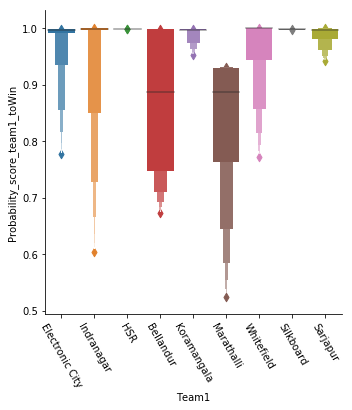

In [262]:
sns.catplot(x="Team1", y="Probability_score_team1_toWin",kind='boxen', data=win_prob1);
plt.xticks(rotation= -60)

In [246]:
win_prob2 = result[result['Predicted_team']=='Team 2']
win_prob2=win_prob2[['Team2','Team1','Probability_Score']]
win_prob2.rename(columns={'Team1':'v/s Team1','Probability_Score': 'Probability_score_team2_toWin'},inplace = True)
print ("Average Probability score for Team 2 to Win the Match versus Team 1 in Second Innings: %.3f" %(win_prob2.mean()))
print("And below are the corresponding Probability Scores of Team 2 for respective matches:")
win_prob2

Average Probability score for Team 2 to Win the Match versus Team 1 in Second Innings: 0.925
And below are the corresponding Probability Scores of Team 2 for respective matches:


,Team2,v/s Team1,Probability_score_team2_toWin
1,Sarjapur,Koramangala,0.908817
2,Marathalli,HSR,0.958397
4,Sarjapur,Whitefield,0.906120
6,Koramangala,Indranagar,0.970126
10,Sarjapur,Electronic City,0.671269
14,Koramangala,Indranagar,0.999117
19,Indranagar,Bellandur,0.900443
20,Whitefield,HSR,0.998797
21,Koramangala,Silkboard,0.894774
23,HSR,Electronic City,0.953732


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

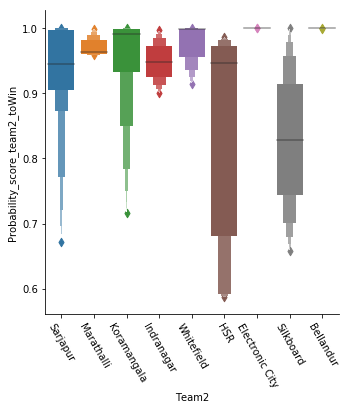

In [261]:
sns.catplot(x="Team2", y="Probability_score_team2_toWin",kind='boxen', data=win_prob2);
plt.xticks(rotation= -60)